## Overdensity probability distributions

In this notebook we plot the distribution of galaxy overdensities calculated at different redshifts and with differing aperture configurations.

`overdensity_cylinder.py` is the script used for calculating overdensity in a given cylinder configuration for a given galaxy selection, including redshift distortions, and is called as so:

``` 
python overdensity_cylinder.py selection_string redshift_str random_bool R half_deltac
```

- `selection_str` is the selection (`sfr` or `stellarMass`)
- `redshift_str` is the redshift selection (e.g. `2p07`) 
- random_bool is a boolean specifying whether to calculate the overdensity for randomly placed regions (`1`) or for each galaxy (`0`)
- `R` is the cylindircal radius in $\mathrm{cMpc}$
- `half_deltac` is half the depth of the cylinder in $\mathrm{cMpc}$

In [1]:
import pandas as pd
import numpy as np

import pickle as pcl

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

from methods import bhattacharyya
from methods import plotit
from methods import overdensity_cylinder
from methods import factor_h
from methods import z_distort

directory = '/lustre/scratch/astro/cl478/protoclusters_data/'
out_directory ='output/'

h = 0.673
L = 480.279 / h # box side length

N = 200000    # number of random regions

Load galaxy dataframes

In [ ]:
redshifts = ['2p07','3p10','3p95','5p03','5p92','6p97','8p22','8p93','9p72']
zees = [float(z.replace('p','.')) for z in redshifts]

gals_sfr = [None] * len(redshifts)
gals_mstar = [None] * len(redshifts)

for i, z in enumerate(redshifts):
#     print i, z
    
    gals_sfr[i] = pd.read_csv('%shenriques2015a_z%s_sfr_r200.csv'%(directory,z), 
                              skiprows=122, skipfooter=1, engine='python')
    
    gals_mstar[i] = pd.read_csv('%shenriques2015a_z%s_stellarMass_r200.csv'%(directory,z), 
                                skiprows=122, skipfooter=1, engine='python')

Factor out $h$ and apply $z$-distortion

In [ ]:
for i, z in enumerate(zees):
    for gals in [gals_sfr, gals_mstar]:
        gals[i] = z_distort(factor_h(gals[i], h), z, L)

#         print "Filling in NaN values..."
        gals[i].ix[np.isnan(gals[i]['z0_haloId']), 'z0_haloId'] = -1
        gals[i].ix[np.isnan(gals[i]['z0_centralId']), 'z0_centralId'] = -1
        gals[i].ix[np.isnan(gals[i]['z0_central_mcrit200']), 'z0_central_mcrit200'] = 0
    

## Calculate $\delta_{\mathrm{gal}}$

Calculate and save dgal for paper plots

In [3]:
# coods = pd.DataFrame(np.random.rand(N,3) * L, columns=['zn_x','zn_y','zn_z']) # generate random regions

# out_stats_sfr_z3p95_r10_dc10 = overdensity_cylinder(gals_sfr[2], coods, L=L, random=True, 
#                                                     R=10, dc=10, verbose=False)
# out_stats_sfr_z3p95_r6_dc6 = overdensity_cylinder(gals_sfr[2], coods, L=L, random=True, 
#                                                   R=6, dc=6, verbose=False)
# out_stats_sfr_z3p95_r14_dc14 = overdensity_cylinder(gals_sfr[2], coods, L=L, random=True, 
#                                                     R=14, dc=14, verbose=False)

# out_stats_sfr_z3p95_r6_dc14 = overdensity_cylinder(gals_sfr[2], coods, L=L, random=True, 
#                                                      R=6, dc=14, verbose=False)
# out_stats_sfr_z3p95_r10_dc14 = overdensity_cylinder(gals_sfr[2], coods, L=L, random=True, 
#                                                      R=10, dc=14, verbose=False)

# out_stats_sfr_z3p10_r10_dc10 = overdensity_cylinder(gals_sfr[1], coods, L=L, random=True, 
#                                                       R=10, dc=10, verbose=False)
# out_stats_sfr_z5p03_r10_dc10 = overdensity_cylinder(gals_sfr[3], coods, L=L, random=True, 
#                                                       R=10, dc=10, verbose=False)

# out_stats_mstar_z2p07_r10_dc10 = overdensity_cylinder(gals_mstar[0], coods, L=L, random=True, 
#                                                         R=10, dc=10, verbose=False)
# out_stats_mstar10_z2p07_r10_dc10 = overdensity_cylinder(gals_mstar[0][gals_mstar[0]['zn_stellarMass'] > 1]\
#                                                         .reset_index(drop=True), coods, L=L, random=True, 
#                                                         R=10, dc=10, verbose=True)

# pcl.dump([out_stats_sfr_z3p95_r10_dc10, out_stats_sfr_z3p95_r6_dc6, out_stats_sfr_z3p95_r14_dc14,
#          out_stats_sfr_z3p95_r6_dc14, out_stats_sfr_z3p95_r10_dc14, out_stats_sfr_z3p10_r10_dc10,
#          out_stats_sfr_z5p03_r10_dc10, out_stats_mstar_z2p07_r10_dc10, out_stats_mstar10_z2p07_r10_dc10], 
#          open('out_stats.p','w'))

out_stats_sfr_z3p95_r10_dc10, out_stats_sfr_z3p95_r6_dc6, out_stats_sfr_z3p95_r14_dc14,\
out_stats_sfr_z3p95_r6_dc14, out_stats_sfr_z3p95_r10_dc14, out_stats_sfr_z3p10_r10_dc10,\
out_stats_sfr_z5p03_r10_dc10, out_stats_mstar_z2p07_r10_dc10, out_stats_mstar10_z2p07_r10_dc10 = \
    pcl.load(open('out_stats.p','r'))

Print Bhattacharrya distance ($D_{B}$) for different selections

In [5]:
N = 18

print "sfr_z3p95_r10_dc10:", plotit(1, out_stats_sfr_z3p95_r10_dc10, axb=1, N=N, clim=0.7, plim=0.6, noplot=True), \
"\nsfr_z3p95_r6_dc6:", plotit(1, out_stats_sfr_z3p95_r6_dc6, axb=1, N=N, clim=0.4, plim=0.8, noplot=True), \
"\nsfr_z3p95_r14_dc14:", plotit(1, out_stats_sfr_z3p95_r14_dc14, axb=1, N=N, clim=0.8, plim=0.4, noplot=True),"\n"

print "sfr_z3p95_r6_dc14:", plotit(1, out_stats_sfr_z3p95_r6_dc14, axb=1, N=N, clim=0.6, plim=0.4, noplot=True), \
"\nsfr_z3p95_r10_dc14", plotit(1, out_stats_sfr_z3p95_r10_dc14, axb=1, N=N, clim=0.6, plim=0.4, noplot=True),"\n"

print "sfr_z3p10_r10_dc10:", plotit(1, out_stats_sfr_z3p10_r10_dc10, axb=1, N=N, clim=0.6, plim=0.3, noplot=True),\
"\nsfr_z5p03_r10_dc10:", plotit(1, out_stats_sfr_z5p03_r10_dc10, axb=1, N=N, clim=0.7, plim=0.6, noplot=True), "\n"

print "mstar_z2p07_r10_dc10:", plotit(1, out_stats_mstar_z2p07_r10_dc10, axb=1, N=N, clim=0.8, plim=0.4, noplot=True),\
"\nmstar10_z2p07_r10_dc10:", plotit(1, out_stats_mstar10_z2p07_r10_dc10, axb=1, N=N, clim=0.8, plim=0.5, noplot=True), "\n"

sfr_z3p95_r10_dc10: DB(All), DB(High mass)
(0.75, 0.66) 
sfr_z3p95_r6_dc6: DB(All), DB(High mass)
(0.62, 0.38) 
sfr_z3p95_r14_dc14: DB(All), DB(High mass)
(0.54, 0.59) 

sfr_z3p95_r6_dc14: DB(All), DB(High mass)
(0.41, 0.33) 
sfr_z3p95_r10_dc14 DB(All), DB(High mass)
(0.62, 0.51) 

sfr_z3p10_r10_dc10: DB(All), DB(High mass)
(0.62, 0.45) 
sfr_z5p03_r10_dc10: DB(All), DB(High mass)
(0.71, 0.6) 

mstar_z2p07_r10_dc10: DB(All), DB(High mass)
(0.66, 0.53) 
mstar10_z2p07_r10_dc10: DB(All), DB(High mass)
(0.5, 0.35) 



Example plot showing both axes.

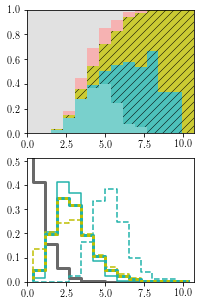

In [5]:
fig, ax = plt.subplots(2,1, figsize=(3,5))

plotit(ax[0], out_stats_sfr_z3p95_r10_dc10, axb=ax[1], N=18, clim=0.5, plim=0.5)

Eample without bottom axis

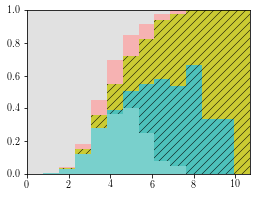

In [6]:
fig, ax = plt.subplots(1,1, figsize=(4,3))

plotit(ax, out_stats_sfr_z3p95_r10_dc10, axb=None, N=18, clim=0.5, plim=0.5)

## Paper figures

Figure 6

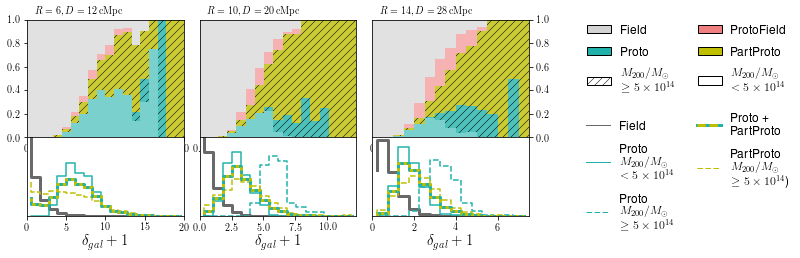

In [81]:
fig = plt.figure(figsize=(9, 13))

gs1 = gridspec.GridSpec(18, 3)
gs1.update(wspace=0.1, hspace=0)

ax1 = fig.add_subplot(gs1[0:3,0])
ax1b = fig.add_subplot(gs1[3:5,0])

ax2 = fig.add_subplot(gs1[0:3,1])
ax2b = fig.add_subplot(gs1[3:5,1])

ax3 = fig.add_subplot(gs1[0:3,2])
ax3b = fig.add_subplot(gs1[3:5,2])

N = 19

plotit(ax1, out_stats_sfr_z3p95_r6_dc6, axb=ax1b, N=N, clim=0.4, plim=0.8)
ax1.text(0.05,1.05,'$R = 6, D = 12 \,\mathrm{cMpc}$', transform=ax1.transAxes)

plotit(ax2, out_stats_sfr_z3p95_r10_dc10, axb=ax2b, N=N, clim=0.7, plim=0.6)
ax2.text(0.05,1.05,'$R = 10, D = 20 \,\mathrm{cMpc}$', transform=ax2.transAxes)

plotit(ax3, out_stats_sfr_z3p95_r14_dc14, axb=ax3b, N=N, clim=0.8, plim=0.4)
ax3.text(0.05,1.05,'$R = 14, D = 28 \,\mathrm{cMpc}$', transform=ax3.transAxes)

ax3.yaxis.tick_right()
ax3b.yaxis.tick_right()

ax2.set_yticks([])
for ax in ([ax1b,ax2b,ax3b]):
    ax.set_yticks([])
    ax.set_xlabel('$\delta_{gal} + 1$', size=15)
    

# Legend 1
pat1 = mpatches.Patch(color='lightgrey',label='Field')
pat2 = mpatches.Patch(color='lightseagreen',label='Proto')
pat3 = mpatches.Patch(color='lightcoral',label='ProtoField')
pat4 = mpatches.Patch(color='y',label='PartProto')
patM1 = mpatches.Patch(color='white', hatch='///',label='$M_{200} / M_{\odot}$ \n $\geq 5 \\times 10^{14}$')
patM2 = mpatches.Patch(color='white', hatch='',label='$M_{200} / M_{\odot}$ \n $< 5 \\times 10^{14}$')
colors = ['dimgrey','lightseagreen','lightcoral', 'y']
    
legend = ax3.legend(handles = [pat1,pat2,patM1,pat3,pat4,patM2], bbox_to_anchor=(1.3, 1.05),
                    ncol=2, prop={'size': 12}, labelspacing=0.9)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('white')

for patch in legend.get_patches():
    patch.set_edgecolor('black')
    

# Legend 2
line_field = plt.Line2D((0,1.5),(0,0), color='dimgrey', linestyle='solid', linewidth=1)
line_proto1 = plt.Line2D((0,1.5),(0,0), color='lightseagreen', linestyle='solid', linewidth=1)
line_proto2= plt.Line2D((0,1.5),(0,0), color='lightseagreen', linestyle='dashed', linewidth=1)
line_part = plt.Line2D((0,1.5),(0,0), color='y', linestyle='dashed', linewidth=1)

line_comb1 = plt.Line2D((0,1.5),(0,0), color='lightseagreen', linestyle='solid', linewidth=3)
line_comb2 = plt.Line2D((0,1.5),(0,0), color='y', linestyle='dashed', linewidth=3)

legend = ax3b.legend(handles = [line_field,line_proto1,line_proto2,(line_comb1, line_comb2),line_part],
                     labels=['Field','Proto \n $M_{200} / M_{\odot}$\n$< 5 \\times 10^{14}$',
                             'Proto \n$M_{200} / M_{\odot}$\n$\geq 5 \\times 10^{14}$',
                              'Proto + \n PartProto',
                            'PartProto \n$M_{200} / M_{\odot}$\n$\geq 5 \\times 10^{14}$)'],
                     bbox_to_anchor=(2.72, 1.45), ncol=2, prop={'size': 12}, labelspacing=1.0)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('white')

# plt.savefig(out_directory+'probabilities_A.png', bbox_inches='tight', dpi=300)

Figure 7

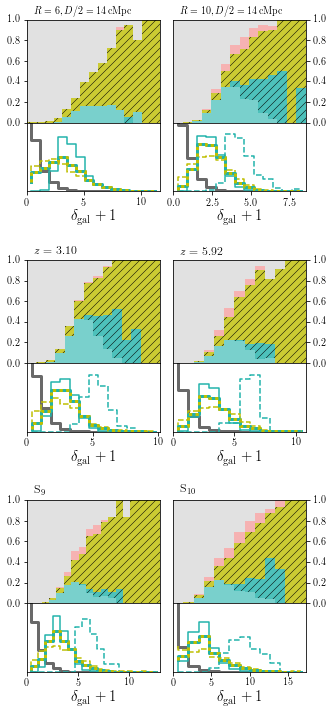

In [6]:
fig = plt.figure(figsize=(5, 12))

gs = gridspec.GridSpec(19, 2)
gs.update(wspace=0.1, hspace=0)

ax1 = fig.add_subplot(gs[0:3,0])
ax1b = fig.add_subplot(gs[3:5,0])

ax2 = fig.add_subplot(gs[0:3,1])
ax2b = fig.add_subplot(gs[3:5,1])

ax3 = fig.add_subplot(gs[7:10,0])
ax3b = fig.add_subplot(gs[10:12,0])

ax4 = fig.add_subplot(gs[7:10,1])
ax4b = fig.add_subplot(gs[10:12,1])

ax5 = fig.add_subplot(gs[14:17,0])
ax5b = fig.add_subplot(gs[17:19,0])

ax6 = fig.add_subplot(gs[14:17,1])
ax6b = fig.add_subplot(gs[17:19,1])

N = 19

plotit(ax1, out_stats_sfr_z3p95_r6_dc14, axb=ax1b, N=N, clim=0.6, plim=0.4)
ax1.text(0.05,1.05,'$R = 6, D/2 = 14 \,\mathrm{cMpc}$', transform=ax1.transAxes, size=10)

plotit(ax2, out_stats_sfr_z3p95_r10_dc14, axb=ax2b, N=N, clim=0.6, plim=0.4)
ax2.text(0.05,1.05,'$R = 10, D/2 = 14\,\mathrm{cMpc}$', transform=ax2.transAxes, size=10)

plotit(ax3, out_stats_sfr_z3p10_r10_dc10, clim=0.6, plim=0.3, N=N, axb = ax3b)
ax3.text(0.05,1.05,'$z = 3.10$', transform=ax3.transAxes, size=12)

plotit(ax4, out_stats_sfr_z5p03_r10_dc10, clim=0.7, plim=0.6, N=N, axb = ax4b)
ax4.text(0.05,1.05,'$z = 5.92$', transform=ax4.transAxes, size=12)

plotit(ax5, out_stats_mstar_z2p07_r10_dc10, N=N, clim=0.8, plim=0.4, axb=ax5b)
ax5.text(0.05,1.05,'$\mathrm{S}_9$', transform=ax5.transAxes, size=12)

plotit(ax6, out_stats_mstar10_z2p07_r10_dc10, N=N, clim=0.8, plim=0.5, axb=ax6b)
ax6.text(0.05,1.05,'$\mathrm{S}_{10}$', transform=ax6.transAxes, size=12)


for ax in [ax2,ax4,ax6]:
    ax.yaxis.tick_right()
    
for ax in [ax1b,ax2b,ax3b,ax4b,ax5b,ax6b]:
    ax.set_yticks([])
    ax.set_xlabel('$\delta_{\mathrm{gal}} + 1$', size=15)

for ax in [ax1,ax2,ax3,ax4,ax5,ax6]:
    ax.set_xticklabels([])


# plt.savefig(out_directory+'probabilities_depth.png', bbox_inches='tight', dpi=300)

Appendix figure

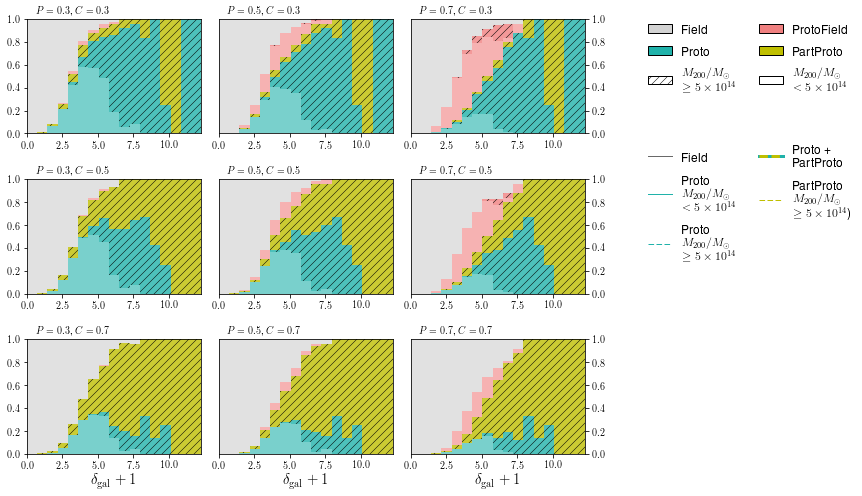

In [84]:
fig = plt.figure(figsize=(10, 8))

gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0.1, hspace=0.4) # bottom = 0.57, top = 1, , wspace=0

N = 19

ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[2,0])

for clim, ax in zip([0.3, 0.5, 0.7], [ax1,ax2,ax3]):
    plotit(ax, out_stats_sfr_z3p95_r10_dc10, plim=0.3, clim=clim, N=N)
    ax.text(0.05,1.05,'$P = 0.3$, $C = %s$'%clim, transform=ax.transAxes)
    

ax4 = fig.add_subplot(gs[0,1])
ax5 = fig.add_subplot(gs[1,1])
ax6 = fig.add_subplot(gs[2,1])

for clim, ax in zip([0.3, 0.5, 0.7], [ax4, ax5, ax6]):
    plotit(ax, out_stats_sfr_z3p95_r10_dc10, plim=0.5, clim=clim, N=N)
    ax.text(0.05,1.05,'$P = 0.5$, $C = %s$'%clim, transform=ax.transAxes)
    ax.set_yticks([])
    

ax7 = fig.add_subplot(gs[0,2])
ax8 = fig.add_subplot(gs[1,2])
ax9 = fig.add_subplot(gs[2,2])

for clim, ax in zip([0.3, 0.5, 0.7], [ax7, ax8, ax9]):
    plotit(ax, out_stats_sfr_z3p95_r10_dc10, plim=0.7, clim=clim, N=N)
    ax.text(0.05,1.05,'$P = 0.7$, $C = %s$'%clim, transform=ax.transAxes)
    ax.yaxis.tick_right()
    

for ax in [ax3, ax6, ax9]:
    ax.set_xlabel('$\delta_{\mathrm{gal}} + 1$', size=15)


# Legend
pat1 = mpatches.Patch(color='lightgrey',label='Field')
pat2 = mpatches.Patch(color='lightseagreen',label='Proto')
pat3 = mpatches.Patch(color='lightcoral',label='ProtoField')
pat4 = mpatches.Patch(color='y',label='PartProto')
patM1 = mpatches.Patch(color='white', hatch='///',label='$M_{200} / M_{\odot}$ \n $\geq 5 \\times 10^{14}$')
patM2 = mpatches.Patch(color='white', hatch='',label='$M_{200} / M_{\odot}$ \n $< 5 \\times 10^{14}$')
colors = ['dimgrey','lightseagreen','lightcoral', 'y']
    
legend = ax7.legend(handles = [pat1,pat2,patM1,pat3,pat4,patM2], bbox_to_anchor=(1.3, 1.05),
                    ncol=2, prop={'size': 12}, labelspacing=0.9)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('white')

for patch in legend.get_patches():
    patch.set_edgecolor('black')
    
# Legend
line_field = plt.Line2D((0,1.5),(0,0), color='dimgrey', linestyle='solid', linewidth=1)
line_proto1 = plt.Line2D((0,1.5),(0,0), color='lightseagreen', linestyle='solid', linewidth=1)
line_proto2= plt.Line2D((0,1.5),(0,0), color='lightseagreen', linestyle='dashed', linewidth=1)
line_part = plt.Line2D((0,1.5),(0,0), color='y', linestyle='dashed', linewidth=1)

line_comb1 = plt.Line2D((0,1.5),(0,0), color='lightseagreen', linestyle='solid', linewidth=3)
line_comb2 = plt.Line2D((0,1.5),(0,0), color='y', linestyle='dashed', linewidth=3)

legend = ax8.legend(handles = [line_field,line_proto1,line_proto2,(line_comb1, line_comb2),line_part],
                     labels=['Field','Proto \n $M_{200} / M_{\odot}$\n$< 5 \\times 10^{14}$',
                             'Proto \n$M_{200} / M_{\odot}$\n$\geq 5 \\times 10^{14}$',
                              'Proto + \n PartProto',
                            'PartProto \n$M_{200} / M_{\odot}$\n$\geq 5 \\times 10^{14}$)'],
                     bbox_to_anchor=(1.3, 1.4), ncol=2, prop={'size': 12}, labelspacing=1.0)

legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('white')
    
# plt.savefig(out_directory+'probabilities_C.png', bbox_inches='tight', dpi=300)